### Treinando a rede no dataset normal


In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt 
import keras
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

In [0]:
!unzip dataset4.zip

In [0]:
train_dir = 'dataset4/train' 
validation_dir = 'dataset4/test' 

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow_from_directory(
train_dir,
color_mode='grayscale',
target_size=(24, 16),
batch_size=1,
class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
validation_dir,
color_mode='grayscale', 
target_size=(24, 16),
batch_size=1,
class_mode='categorical')

Found 220 images belonging to 5 classes.
Found 55 images belonging to 5 classes.


In [0]:
model = models.Sequential()

model.add(layers.Conv2D(20, (3, 3), activation='relu', padding='same', input_shape=(24, 16, 1)))
#model.add(layers.Conv2D(30, (3, 3), activation='relu', padding='same', input_shape=(240, 180, 1)))
model.add(layers.Conv2D(20, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(40, (3, 3),padding='same', activation='relu'))
model.add(layers.Conv2D(40, (3, 3),padding='same', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_159 (Conv2D)          (None, 24, 16, 20)        200       
_________________________________________________________________
conv2d_160 (Conv2D)          (None, 22, 14, 20)        3620      
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 11, 7, 20)         0         
_________________________________________________________________
dropout_90 (Dropout)         (None, 11, 7, 20)         0         
_________________________________________________________________
conv2d_161 (Conv2D)          (None, 11, 7, 40)         7240      
_________________________________________________________________
conv2d_162 (Conv2D)          (None, 11, 7, 40)         14440     
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 5, 3, 40)          0         
__________

In [0]:
#opt = keras.optimizers.rmsprop(lr=0.000001)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
hist = model.fit_generator(
train_generator,
steps_per_epoch=220,
epochs=50,
validation_data=validation_generator,
validation_steps=55)


Epoch 1/50
220/220 [==============================] - 9s 41ms/step - loss: 1.8552 - acc: 0.1955 - val_loss: 1.6761 - val_acc: 0.1818
Epoch 2/50
220/220 [==============================] - 6s 26ms/step - loss: 1.5759 - acc: 0.3227 - val_loss: 1.3894 - val_acc: 0.4182
Epoch 3/50
220/220 [==============================] - 6s 26ms/step - loss: 1.2607 - acc: 0.5273 - val_loss: 0.9231 - val_acc: 0.5455
Epoch 4/50
220/220 [==============================] - 6s 26ms/step - loss: 1.0981 - acc: 0.6045 - val_loss: 0.9330 - val_acc: 0.6909
Epoch 5/50
220/220 [==============================] - 6s 26ms/step - loss: 0.9141 - acc: 0.7182 - val_loss: 0.5934 - val_acc: 0.7273
Epoch 6/50
220/220 [==============================] - 6s 29ms/step - loss: 0.8846 - acc: 0.7182 - val_loss: 0.6400 - val_acc: 0.8182
Epoch 7/50
220/220 [==============================] - 7s 30ms/step - loss: 0.8511 - acc: 0.7500 - val_loss: 0.6616 - val_acc: 0.7091
Epoch 8/50
220/220 [==============================] - 6s 26ms/step - 

In [0]:
def moving_average(sequence, n=2):
  
  new = []
  new.append(sequence[0])
  for i in np.arange(n-1, len(sequence)-n+1):
    
    new.append( (sequence[i-1] +  sequence[i]+ sequence[i+1])/3)
  
  return np.array(new)

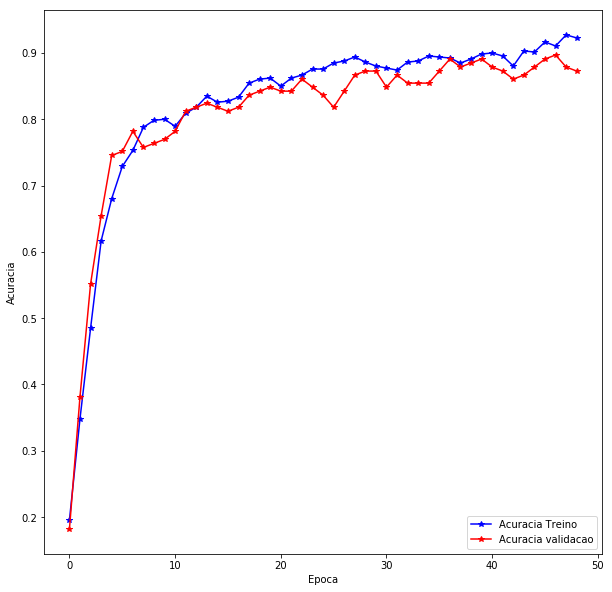

In [0]:
plt.rcParams['figure.figsize'] = 10, 10

acc = hist.history['acc']
acc_val = hist.history['val_acc']
ep = list(range(len(acc)))
plt.plot(ep[:49], moving_average(acc), '*-b', label='Acuracia Treino')
plt.plot(ep[:49], moving_average(acc_val), '*-r', label='Acuracia validacao')
plt.xlabel('Epoca')
plt.ylabel('Acuracia')
plt.legend(loc=4)
plt.savefig('Q4_acc_100.png')

In [0]:
model.save("Q4_trained.h5")

### Avaliando a rede com imagens rotacionadas e com ruído

####Rodar esses comandos apenas uma vez

In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt 
import keras
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

In [0]:
!unzip dataset4.zip

In [0]:
!mkdir rotated_dataset

In [0]:
!mkdir noise_dataset

In [0]:
!mkdir noise_and_rotated

In [0]:
rede_loaded = models.load_model("Q4_trained.h5")

####Dataset sem alterações (validação)



In [28]:
validation_dir = 'dataset4/test' 

validation_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=0,
fill_mode='nearest'
)

validation_generator = validation_datagen.flow_from_directory(
validation_dir,
color_mode='grayscale', 
target_size=(24, 16),
batch_size=55,
class_mode='categorical',
)

Found 55 images belonging to 5 classes.


In [29]:
loss, acc = rede_loaded.evaluate_generator(validation_generator,steps=1,verbose=1)
print('Test loss:', loss)
print('Test accuracy:', acc)

1/1 [==============================] - 1s 1s/step
Test loss: 0.6814412474632263
Test accuracy: 0.8363636136054993


#### Dataset com rotação

In [0]:
validation_dir = 'dataset4/test' 

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    fill_mode='nearest')


In [33]:
validation_generator = validation_datagen.flow_from_directory(
validation_dir,
color_mode='grayscale', 
target_size=(24, 16),
batch_size=55,
class_mode='categorical',
save_to_dir='rotated_dataset',
save_prefix='rotated_')

Found 55 images belonging to 5 classes.


In [34]:
loss, acc = rede_loaded.evaluate_generator(validation_generator,steps=1,verbose=1)
print('Test loss:', loss)
print('Test accuracy:', acc)

1/1 [==============================] - 1s 1s/step
Test loss: 1.7242181301116943
Test accuracy: 0.4909090995788574


#### Dataset com ruido

In [0]:
def salt_and_pepper(image):
  chance = np.random.randint(99,size=image.shape)
  noise = np.random.random_sample(size=image.shape)
  final = np.where(chance < 5, noise, image)
  return final
  

In [51]:
validation_dir = 'dataset4/test' 

validation_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=0,
fill_mode='nearest',
preprocessing_function=salt_and_pepper)

validation_generator = validation_datagen.flow_from_directory(
validation_dir,
color_mode='grayscale', 
target_size=(24, 16),
batch_size=55,
class_mode='categorical',
save_to_dir='noise_dataset',
save_prefix='noise_')


Found 55 images belonging to 5 classes.


In [52]:
loss, acc = rede_loaded.evaluate_generator(validation_generator,steps=1,verbose=1)
print('Test loss:', loss)
print('Test accuracy:', acc)

1/1 [==============================] - 1s 1s/step
Test loss: 1.2248457670211792
Test accuracy: 0.7272727489471436


####Dataset com rotação e ruído

In [49]:
validation_dir = 'dataset4/test' 

validation_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=60,
fill_mode='nearest',
preprocessing_function=salt_and_pepper)

validation_generator = validation_datagen.flow_from_directory(
validation_dir,
color_mode='grayscale', 
target_size=(24, 16),
batch_size=55,
class_mode='categorical',
save_to_dir='noise_and_rotated',
save_prefix='noise_rotated_'
)


Found 55 images belonging to 5 classes.


In [50]:
loss, acc = rede_loaded.evaluate_generator(validation_generator,steps=1,verbose=1)
print('Test loss:', loss)
print('Test accuracy:', acc)

1/1 [==============================] - 1s 1s/step
Test loss: 2.0191049575805664
Test accuracy: 0.4363636374473572


#### Testes do ruido

In [0]:
# def test_noise(image):
#   chance = np.random.randint(99,size=image.shape)
#   noise = np.random.random_sample(size=image.shape)
#   final = np.where(chance < 5, noise, image)
#   return final
  

In [0]:
# !mkdir noise_test_normal

In [20]:
# validation_dir = 'dataset4/test' 

# validation_datagen = ImageDataGenerator(
# rescale=1./255,
# rotation_range=0,
# fill_mode='nearest',
# preprocessing_function=test_noise)

# validation_generator = validation_datagen.flow_from_directory(
# validation_dir,
# color_mode='grayscale', 
# target_size=(24, 16),
# batch_size=55,
# class_mode='categorical',
# save_to_dir='noise_test_normal',
# save_prefix='noiseTest')


Found 55 images belonging to 5 classes.


In [21]:
# loss, acc = rede_loaded.evaluate_generator(validation_generator,steps=1,verbose=1)
# print('Test loss:', loss)
# print('Test accuracy:', acc)

1/1 [==============================] - 1s 1s/step
Test loss: 1.9270159006118774
Test accuracy: 0.6181818246841431
